# Scipy

## Cubic spline interpolation to create a smooth surface from complex 3D data points:

/var/folders/1y/b_fbg_px6rz7r15bg95r0wfc0000gn/T/ipykernel_24077/2116478282.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


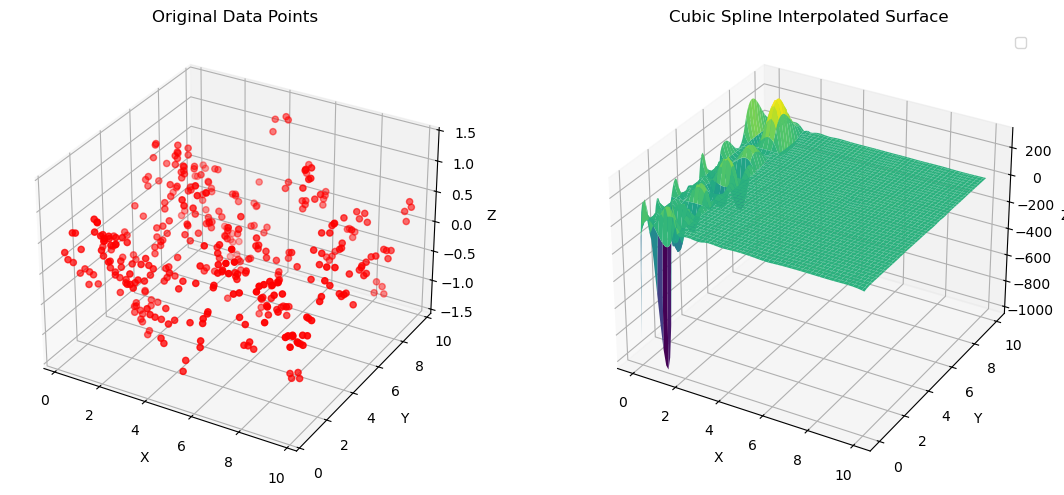

Sample original points (first 5):
x: 0.21, y: 0.46, z: 0.30
x: 0.58, y: 0.65, z: 0.15
x: 1.56, y: 0.98, z: 0.04
x: 1.56, y: 1.39, z: -0.22
x: 1.82, y: 1.71, z: -0.21

Sample interpolated points (first 5):
x: 0.00, y: 0.00, z: -861.26
x: 0.10, y: 0.10, z: -408.80
x: 0.20, y: 0.20, z: -112.01
x: 0.30, y: 0.30, z: 55.34
x: 0.40, y: 0.40, z: 119.46


In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample complex data
np.random.seed(42)
n_points = 20

# Create irregular x, y coordinates
x = np.sort(np.random.uniform(0, 10, n_points))
y = np.sort(np.random.uniform(0, 10, n_points))
X, Y = np.meshgrid(x, y)

# Create complex z data (combination of sine waves with noise)
Z = (np.sin(X) * np.cos(Y) +
     0.5 * np.sin(2*X) * np.cos(2*Y) +
     np.random.normal(0, 0.1, X.shape))

# Create finer mesh for smooth interpolation
x_fine = np.linspace(0, 10, 100)
y_fine = np.linspace(0, 10, 100)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

# Perform cubic spline interpolation
# First interpolate along x for each y
cs_x = []
for i in range(n_points):
    cs = CubicSpline(x, Z[i, :])
    cs_x.append(cs(x_fine))

# Then interpolate along y
Z_smooth = np.zeros((100, 100))
for i in range(100):
    cs = CubicSpline(y, [cs_x[j][i] for j in range(n_points)])
    Z_smooth[:, i] = cs(y_fine)

# Create 3D plot
fig = plt.figure(figsize=(12, 5))

# Original data points
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X, Y, Z, c='r', marker='o', label='Original Points')
ax1.set_title('Original Data Points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Smooth surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X_fine, Y_fine, Z_smooth, cmap='viridis')
ax2.set_title('Cubic Spline Interpolated Surface')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.legend()
plt.tight_layout()
plt.show()

# Print some sample values for comparison
print("Sample original points (first 5):")
for i in range(min(5, n_points)):
    print(f"x: {x[i]:.2f}, y: {y[i]:.2f}, z: {Z[i, 0]:.2f}")

print("\nSample interpolated points (first 5):")
for i in range(5):
    print(f"x: {x_fine[i]:.2f}, y: {y_fine[i]:.2f}, z: {Z_smooth[i, 0]:.2f}")